In [1]:

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading my data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [11]:
#using the pivot_table method to get the job_title_short along with salary_year_avg median value by job_country
df.pivot_table(values='salary_year_avg', index= 'job_country', columns= 'job_title_short', aggfunc= 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


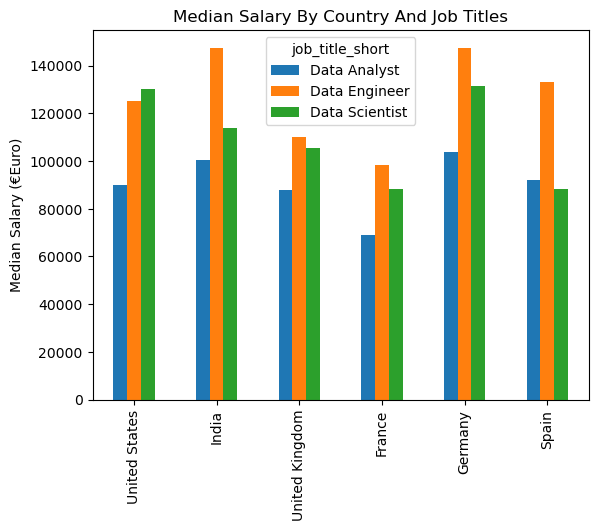

In [ ]:
#creating an array for the column job_country for the value counts for top 6 by index

top_countries = df['job_country'].value_counts().head(6).index
top_countries

# creating the table for the job country salary
df_job_country_salary = df.pivot_table(values='salary_year_avg',
                                       index = 'job_country',
                                       columns = 'job_title_short',
                                       aggfunc = 'median'
                                       )

df_job_country_salary = df_job_country_salary.loc[top_countries]

# filtering the columns that we want

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

#creating a vertical bar chart for our data using the plot method and providing it the type of bar we want.
df_job_country_salary.plot(kind='bar')
# the y labling
plt.ylabel('Median Salary (€Euro)')
# the x labling
plt.xlabel('')
#the title
plt.title('Median Salary By Country And Job Titles')
plt.show()